In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

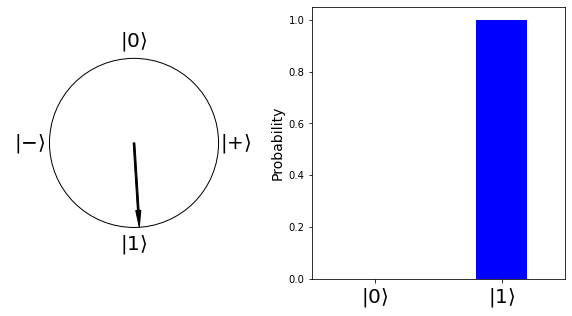

In [10]:
num_frames = 100

fig, ax = plt.subplots(ncols=2, figsize=(10,5))  

ax[0].axis('off')
ax[0].set_xlim(-1.5, 1.5)
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_aspect('equal', adjustable='box')
ax[0].text(0, -1.2, r"$\vert 1 \rangle$", ha="center", va="center", fontsize=20)
ax[0].text(0, 1.2, r"$\vert 0 \rangle$", ha="center", va="center", fontsize=20)
ax[0].text(-1.23, 0, r"$\vert$$-$$\rangle$", ha="center", va="center", fontsize=20)
ax[0].text(1.2, 0, r"$\vert$+$\rangle$", ha="center", va="center", fontsize=20)

ax[1].set_xlim(-2, 2)
ax[1].set_xticks([-1, 1])
ax[1].set_xticklabels([r"$\vert 0 \rangle$", r"$\vert 1 \rangle$"], fontsize=20)
ax[1].set_ylabel("Probability", fontsize=14)

dx = np.array([-np.sin(2*np.pi*t/num_frames) for t in range(num_frames)])
dy = np.array([-np.cos(2*np.pi*t/num_frames) for t in range(num_frames)])

p0 = np.array([np.sin(np.pi*t/num_frames)**2 for t in range(num_frames+1)])
p1 = np.array([np.cos(np.pi*t/num_frames)**2 for t in range(num_frames+1)])

data = np.column_stack([p0, p1])

rects = ax[1].bar([-1,1], data[0], color='blue')
circle = patches.Circle((0,0), radius=1, fill=False,  color='black', linewidth=1)
arrow = patches.Arrow(0, 0, dx[0], dy[0], width=0.1, color='black')

def init():
    circle = patches.Circle(xy=(0,0), radius=1, fill=False, color='black', linewidth=1)
    ax[0].add_patch(circle)
    ax[0].add_patch(circle)
    return circle


def animate(t):
    ax[0].patches.pop(-1)
    arrow = patches.Arrow(0, 0, dx[t], dy[t], width=0.1, color='black')
    ax[0].add_patch(arrow)
    for rect, p in zip(rects, data[t]):
        rect.set_height(p)
    return arrow, rects


anim = FuncAnimation(fig, animate, init_func=init, interval=100, repeat=True, blit=False)
anim.save('animation1.gif', writer='imagemagick', fps=30)